In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [86]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [88]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [89]:
# Reflect the tables into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

#Create a session
session = Session (engine)

C:\Users\Ogechukweu Tasie\AppData\Local\Temp\ipykernel_19084\3025470887.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [90]:
# View all of the classes that automap found
# View all of the classes that automap found
print("Classes found by automap:")
for class_name in Base.classes.keys():
    print(class_name)


Classes found by automap:
station
measurement


In [91]:
# Create our session (link) from Python to the DB
# Import necessary modules
from sqlalchemy.orm import sessionmaker

# Create a session class bound to the engine
Session = sessionmaker(bind=engine)

# Create an instance of the session class
session = Session()

# Exploratory Precipitation Analysis

In [92]:
# Find the most recent date in the data set.
most_recent_data = session.query(func.max(measurement.date)).scalar()
print(most_recent_data)

2017-08-23


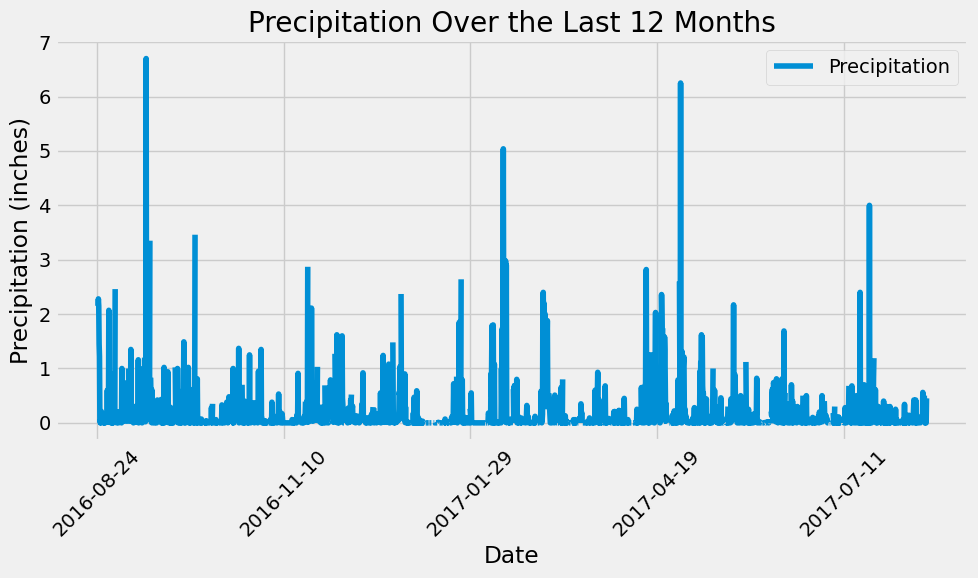

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')
one_year_ago = last_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', figsize=(10, 6), title='Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Ensure the 'df' DataFrame is defined and contains the expected data
# Print the first few rows of the DataFrame to verify
print("First few rows of the DataFrame:")
print(df.head())

# Print the columns in the DataFrame to ensure 'prcp' is present
print("Columns in the DataFrame:", df.columns)

# Check if the 'prcp' column exists in the DataFrame
if 'prcp' in df.columns:
    # Use describe() method to calculate summary statistics
    summary_stats = df['prcp'].describe()

    # Print the summary statistics
    print(precip_df,describe())
else:
    print("The 'prcp' column is not found in the DataFrame.")



First few rows of the DataFrame:
            Date  Precipitation
0     2016-08-24           0.08
1006  2016-08-24            NaN
1524  2016-08-24           2.15
702   2016-08-24           2.28
360   2016-08-24           2.15
Columns in the DataFrame: Index(['Date', 'Precipitation'], dtype='object')
The 'prcp' column is not found in the DataFrame.


# Exploratory Station Analysis

In [95]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [96]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_query = session.query(
    measurement.station,
    func.count(measurement.station).label('count')
).group_by(measurement.station).order_by(func.count(measurement.station).desc())
# Execute the query and print the results
active_stations = active_stations_query.all()
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Design a query to find the most active station
# Get the most active station
most_active_station = active_stations_query.first()
most_active_station_id = most_active_station.station
print(f"Most Active Station ID: {most_active_station_id}")
# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats_query = session.query(
    func.min(measurement.tobs).label('min_temp'),
    func.max(measurement.tobs).label('max_temp'),
    func.avg(measurement.tobs).label('avg_temp')
).filter(measurement.station == most_active_station_id)

# Get the temperature statistics
temperature_stats = temperature_stats_query.one()

print(f"Lowest Temperature: {temperature_stats.min_temp}")
print(f"Highest Temperature: {temperature_stats.max_temp}")
print(f"Average Temperature: {temperature_stats.avg_temp}")

Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


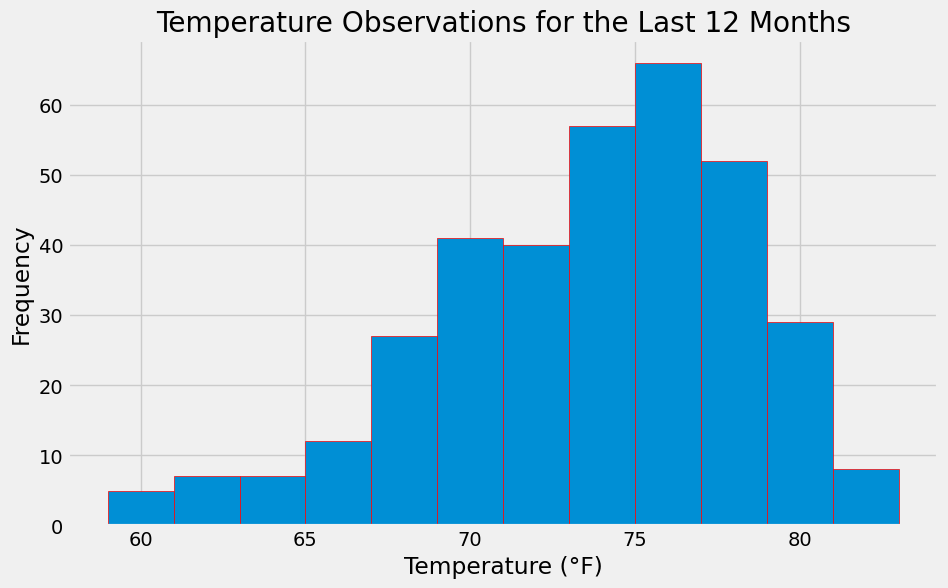

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in the data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(measurement.date, measurement.tobs).filter(
    measurement.station == most_active_station_id,
    measurement.date >= one_year_ago
).all()

# Convert the query results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['date', 'temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['temperature'], bins=12, edgecolor='red')
plt.title('Temperature Observations for the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [99]:
# Close Session
session.close()